**Importing all necessary libraries**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/archive.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1397.jpg', 'with_mask_3563.jpg', 'with_mask_408.jpg', 'with_mask_1513.jpg', 'with_mask_2352.jpg']
['with_mask_3071.jpg', 'with_mask_3582.jpg', 'with_mask_2621.jpg', 'with_mask_1506.jpg', 'with_mask_2781.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_179.jpg', 'without_mask_2956.jpg', 'without_mask_3483.jpg', 'without_mask_901.jpg', 'without_mask_3169.jpg']
['without_mask_3188.jpg', 'without_mask_2278.jpg', 'without_mask_2311.jpg', 'without_mask_3555.jpg', 'without_mask_3791.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Displaying the Images**

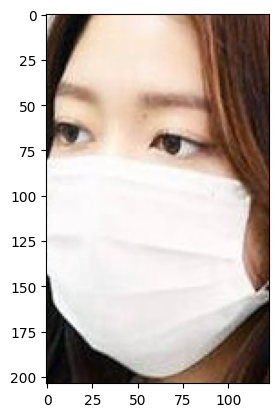

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_97.jpg')
imgplot = plt.imshow(img)
plt.show()

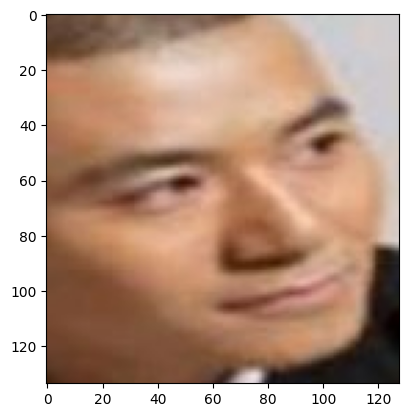

In [ ]:
# displaying with without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_7.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1.Resize the Images

2.Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


array([[[ 72,  69,  62],
        [ 74,  71,  64],
        [ 79,  76,  68],
        ...,
        [ 50,  53,  60],
        [ 54,  58,  65],
        [ 58,  62,  71]],

       [[ 68,  65,  58],
        [ 71,  68,  61],
        [ 78,  75,  67],
        ...,
        [ 52,  55,  62],
        [ 52,  56,  63],
        [ 52,  55,  64]],

       [[ 71,  68,  61],
        [ 71,  68,  62],
        [ 75,  72,  65],
        ...,
        [ 49,  52,  59],
        [ 51,  54,  62],
        [ 54,  56,  66]],

       ...,

       [[188, 152, 121],
        [184, 149, 116],
        [186, 151, 118],
        ...,
        [ 31,  35,  38],
        [ 29,  35,  38],
        [ 29,  36,  38]],

       [[190, 154, 122],
        [190, 154, 122],
        [192, 157, 123],
        ...,
        [ 32,  36,  39],
        [ 30,  36,  39],
        [ 28,  36,  38]],

       [[196, 160, 128],
        [195, 159, 127],
        [193, 158, 124],
        ...,
        [ 34,  38,  41],
        [ 31,  37,  40],
        [ 29,  37,  39]]], dtype=uint8)
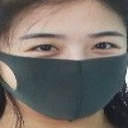

In [ ]:
data[0]

In [ ]:
print(data[0].shape)
print(type(data[0]))

(128, 128, 3)
<class 'numpy.ndarray'>


## **Creating Labels for the two class of Images**

with mask --> 1

without mask --> 0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data) # input
Y = np.array(labels) # output

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

y_test=Y_test/255

y_train=Y_train/255

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[159, 190, 212],
        [148, 184, 209],
        [157, 190, 213],
        ...,
        [177, 218, 254],
        [175, 218, 255],
        [179, 222, 255]],

       [[148, 184, 210],
        [152, 186, 211],
        [165, 196, 221],
        ...,
        [177, 217, 254],
        [176, 218, 255],
        [180, 222, 255]],

       [[150, 186, 211],
        [157, 190, 216],
        [170, 200, 226],
        ...,
        [176, 216, 254],
        [176, 218, 255],
        [181, 222, 255]]], dtype=uint8)
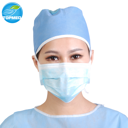

In [ ]:
X_train[0]

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 137s 790ms/step - acc: 0.7057 - loss: 0.6136 - val_acc: 0.8727 - val_loss: 0.3192
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 145s 809ms/step - acc: 0.8812 - loss: 0.2899 - val_acc: 0.8777 - val_loss: 0.2730
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 141s 807ms/step - acc: 0.9006 - loss: 0.2421 - val_acc: 0.8926 - val_loss: 0.2568
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 142s 806ms/step - acc: 0.9210 - loss: 0.1920 - val_acc: 0.8926 - val_loss: 0.2516
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 142s 808ms/step - acc: 0.9219 - loss: 0.1942 - val_acc: 0.9091 - val_loss: 0.2394


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 197ms/step - acc: 0.9251 - loss: 0.2155
Test Accuracy = 0.9219059944152832


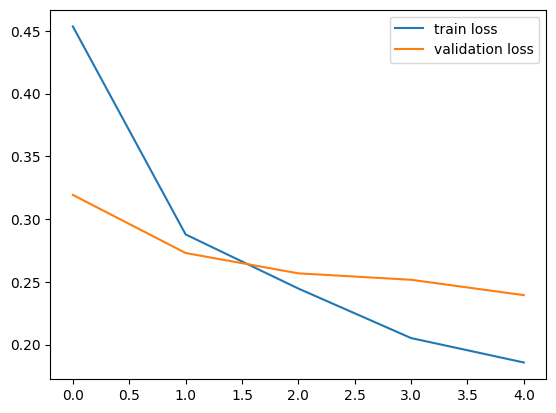

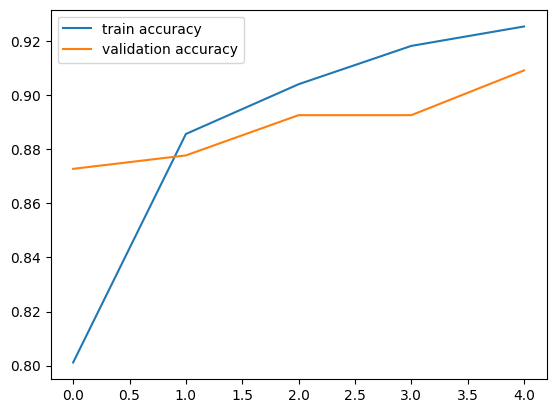

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()